##Model 1 :Baseline CNN (Accuracy 87%)

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# --- Load the EMNIST 'byclass' dataset ---
# This dataset contains 62 classes: 0-9, A-Z, a-z
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,  # Returns (image, label) tuples
    with_info=True,
)

# --- Create a character mapping ---
# The labels are numbers 0-61. Let's map them to their actual characters.
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
num_classes = len(class_mapping)
print(f"Number of classes: {num_classes}")

# --- Preprocessing function ---
def preprocess(image, label):
    # Normalize the image from [0, 255] to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    # EMNIST images are rotated. We need to fix them for display and processing.
    # This involves transposing the image matrix.
    image = tf.transpose(image, perm=[1, 0, 2])

    return image, label

# --- Create the data pipeline ---
batch_size = 128

# For training data: shuffle, map preprocessing, batch, and prefetch
train_data = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.cache()
train_data = train_data.shuffle(ds_info.splits['train'].num_examples)
train_data = train_data.batch(batch_size)
train_data = train_data.prefetch(tf.data.AUTOTUNE)

# For test data: map preprocessing and batch
test_data = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size)
test_data = test_data.cache()
test_data = test_data.prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.D1EAPV_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.D1EAPV_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.
Number of classes: 62


In [ ]:
# Define the CNN model architecture
model = keras.models.Sequential([
    # Input shape 28x28 with 1 color channel
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),

    keras.layers.Dense(128, activation='relu'),
    # The output layer now has 62 neurons for 62 classes
    keras.layers.Dense(num_classes, activation='softmax')
])

# Display a summary of the model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,742 (905.24 KB)

 Trainable params: 231,742 (905.24 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model on the EMNIST data
print("\nStarting EMNIST model training...")
# Note: EMNIST is a larger dataset, so training may take longer
history = model.fit(train_data, epochs=5, validation_data=test_data)
print("EMNIST model training finished!")


Starting EMNIST model training...
Epoch 1/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 625s 96ms/step - accuracy: 0.7736 - loss: 0.7487 - val_accuracy: 0.8510 - val_loss: 0.4202
Epoch 2/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 518s 95ms/step - accuracy: 0.8559 - loss: 0.3982 - val_accuracy: 0.8616 - val_loss: 0.3797
Epoch 3/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 549s 92ms/step - accuracy: 0.8651 - loss: 0.3648 - val_accuracy: 0.8616 - val_loss: 0.3741
Epoch 4/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 503s 92ms/step - accuracy: 0.8694 - loss: 0.3468 - val_accuracy: 0.8662 - val_loss: 0.3619
Epoch 5/5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 503s 92ms/step - accuracy: 0.8732 - loss: 0.3341 - val_accuracy: 0.8650 - val_loss: 0.3628
EMNIST model training finished!


In [ ]:
# Evaluate the model's performance on the test dataset
print("\nEvaluating EMNIST model on test data...")
test_loss, test_acc = model.evaluate(test_data)

print(f"\nEMNIST Test accuracy: {test_acc*100:.2f}%")


Evaluating EMNIST model on test data...
909/909 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.8655 - loss: 0.3616

EMNIST Test accuracy: 86.50%


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 


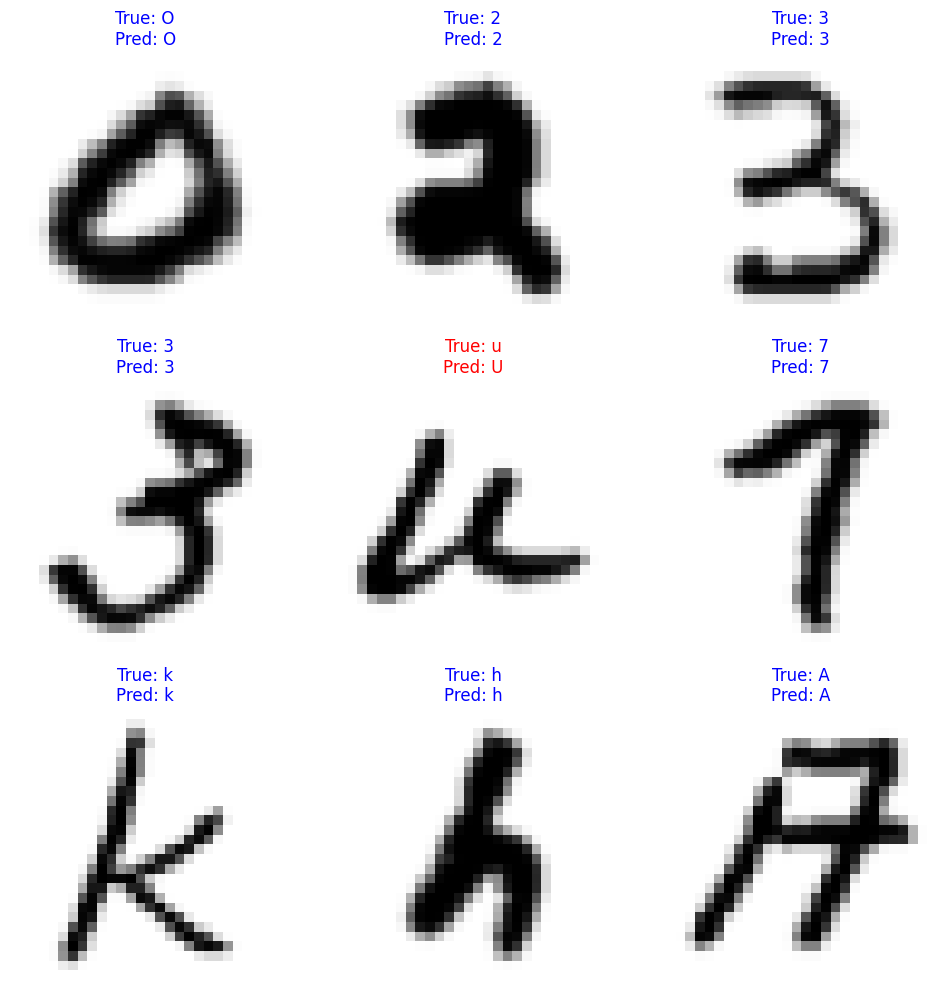

In [ ]:
# Get a batch of test data to make predictions on
for images, labels in test_data.take(1):
    # Make predictions for the whole batch
    predictions = model.predict(images)

    # Display the first few images, their true labels, and predicted labels
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        # Display the image
        plt.imshow(images[i].numpy().squeeze(), cmap=plt.cm.binary)

        # Get the predicted label and true label
        predicted_label_index = np.argmax(predictions[i])
        true_label_index = labels[i].numpy()

        # Use the mapping to get the character
        predicted_char = class_mapping[predicted_label_index]
        true_char = class_mapping[true_label_index]

        # Set the title color based on correctness
        color = 'blue' if predicted_label_index == true_label_index else 'red'

        plt.title(f"True: {true_char}\nPred: {predicted_char}", color=color)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

##Model-2: Improved CNN with Augmentation & Regularization

In [ ]:
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomTranslation, BatchNormalization, Dropout

# Define the improved CNN model architecture
improved_model = keras.models.Sequential([
    # --- 1. DATA AUGMENTATION LAYERS ---
    # These layers are only active during training.
    keras.Input(shape=(28, 28, 1)), # Explicitly define the input layer
    RandomRotation(0.1), # Rotate by up to 10%
    RandomZoom(0.1),     # Zoom by up to 10%

    # --- 2. IMPROVED ARCHITECTURE WITH REGULARIZATION ---
    # First Convolutional Block
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(), # Add Batch Norm
    keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block (Going deeper)
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),

    # Dense (Fully Connected) layers for classification
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5), # Add Dropout with a 50% rate
    keras.layers.Dense(num_classes, activation='softmax')
])

# Still compile the model as before
improved_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# --- 3. ADD A LEARNING RATE SCHEDULER CALLBACK ---
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

# --- TRAIN THE IMPROVED MODEL ---
# Train for more epochs and add the callback
history = improved_model.fit(
    train_data,
    epochs=20, # Train for longer
    validation_data=test_data,
    callbacks=[learning_rate_reduction] # Add the callback here
)

Epoch 1/20
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 1576s 274ms/step - accuracy: 0.6794 - loss: 1.1312 - val_accuracy: 0.8319 - val_loss: 0.4723 - learning_rate: 0.0010
Epoch 2/20
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 1435s 263ms/step - accuracy: 0.8045 - loss: 0.5886 - val_accuracy: 0.8378 - val_loss: 0.4450 - learning_rate: 0.0010
Epoch 3/20
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 1409s 258ms/step - accuracy: 0.8202 - loss: 0.5299 - val_accuracy: 0.8455 - val_loss: 0.4311 - learning_rate: 0.0010
Epoch 4/20
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 1423s 261ms/step - accuracy: 0.8293 - loss: 0.4985 - val_accuracy: 0.8481 - val_loss: 0.4119 - learning_rate: 0.0010
Epoch 5/20
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 1410s 258ms/step - accuracy: 0.8354 - loss: 0.4776 - val_accuracy: 0.8562 - val_loss: 0.3969 - learning_rate: 0.0010
Epoch 6/20
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 1478s 261ms/step - accuracy: 0.8383 - loss: 0.4649 - val_accuracy: 0.8527 - val_loss: 0.4015 - learning_rate: 0.0010
Epoch 7/20
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [ ]:
# Option 1: Save the entire model (architecture + weights + optimizer state)
improved_model.save('final_emnist_cnn_model.h5')

# OR, if you only want weights (smaller file size, need to redefine model later)
# improved_model.save_weights('final_emnist_cnn_weights.h5')

In [ ]:
# Evaluate the model on the test dataset to get the final performance
test_loss, test_acc = improved_model.evaluate(test_data, verbose=2)

# Print the results in a user-friendly format
print(f"\nFinal Test Loss: {test_loss}")
print(f"Final Test Accuracy: {test_acc * 100:.2f}%")

909/909 - 50s - 55ms/step - accuracy: 0.8596 - loss: 0.3746

Final Test Loss: 0.374621719121933
Final Test Accuracy: 85.96%


##Model-3 Running more epochs in order to increase accuracy

In [ ]:
# CELL 1: DEFINE THE CALLBACK
from keras.callbacks import ModelCheckpoint

print("Checkpoint callback defined.")
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

Checkpoint callback defined.


In [ ]:
# CELL 3: RESUME TRAINING FROM EPOCH 20 TO 40

# Load the best weights saved during the previous training run
# Make sure the 'improved_model' architecture is defined before this step.
# If you restarted the runtime, you need to run the cell that defines improved_model first.
# If you have already run the cell that defines the improved_model, uncomment the line below to load the weights:
# improved_model.load_weights('best_model.weights.h5')

print("Resuming training...")

history_part2 = improved_model.fit(
    train_data,
    epochs=40,
    initial_epoch=28,
    validation_data=test_data,
    callbacks=[learning_rate_reduction, checkpoint_callback]
)

Resuming training...


NameError: name 'improved_model' is not defined

##Model -4 Trying a total of 50 epochs
(Saved the data in.h5 file and lost all the original training weights and bias improved by saving them this time on Google drive)

Trying again from scratch this time taking 5 epochs ata a time to atotal of 50 epochs while saving the weight after every 5 epochs in Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import RandomRotation, RandomZoom, BatchNormalization, Dropout
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

print("All necessary libraries imported.")

All necessary libraries imported.


In [ ]:
# --- Load the EMNIST 'byclass' dataset ---
print("Loading EMNIST 'byclass' dataset...")
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print("Dataset loaded.")

# --- Create a character mapping ---
# EMNIST 'byclass' has 62 categories: 0-9, A-Z, a-z
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
num_classes = len(class_mapping)
print(f"Number of classes: {num_classes}")

# --- Preprocessing function ---
# Transposes the image (EMNIST images are often stored rotated) and normalizes pixel values
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    image = tf.transpose(image, perm=[1, 0, 2]) # Transpose from (28,28,1) to (28,28,1) if needed by default it can be loaded as such
    return image, label

# --- Create the data pipeline ---
batch_size = 128
print(f"Using batch size: {batch_size}")

print("Setting up training data pipeline...")
train_data = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.cache() # Cache data after preprocessing
train_data = train_data.shuffle(ds_info.splits['train'].num_examples) # Shuffle the training data
train_data = train_data.batch(batch_size) # Batch the data
train_data = train_data.prefetch(tf.data.AUTOTUNE) # Prefetch for performance

print("Setting up test data pipeline...")
test_data = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_data = test_data.batch(batch_size)
test_data = test_data.cache()
test_data = test_data.prefetch(tf.data.AUTOTUNE)

print("EMNIST data loaded and preprocessed, pipelines created!")

Loading EMNIST 'byclass' dataset...


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.EQM0FV_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/byclass/incomplete.EQM0FV_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/byclass/3.1.0. Subsequent calls will reuse this data.
Dataset loaded.
Number of classes: 62
Using batch size: 128
Setting up training data pipeline...
Setting up test data pipeline...
EMNIST data loaded and preprocessed, pipelines created!


In [ ]:
# Define the improved CNN model architecture
improved_model = keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)), # Explicitly define the input layer for 28x28 grayscale images
    RandomRotation(0.1, fill_mode='nearest'), # Rotate by up to 10% (fills empty areas with nearest pixels)
    RandomZoom(0.1, fill_mode='nearest'),     # Zoom by up to 10%

    # First Convolutional Block
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(), # Stabilizes learning
    keras.layers.MaxPooling2D((2, 2)), # Reduces dimensionality

    # Second Convolutional Block (Go deeper/wider)
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block (Further deepening)
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(), # Flatten for Dense layers

    # Dense (Fully Connected) layers for classification
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5), # Regularization to prevent overfitting
    keras.layers.Dense(num_classes, activation='softmax') # Output layer for 62 classes
])

# Compile the model
improved_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

print("CNN model architecture defined and compiled!")
improved_model.summary()

CNN model architecture defined and compiled!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation                 │ (None, 28, 28, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │         7,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,150 (973.24 KB)

 Trainable params: 248,702 (971.49 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
import os

# --- IMPORTANT: PASTE YOUR EXACT FOLDER PATH HERE ---
# This should be the same path you're using for 'checkpoint_folder' in your training cell.
# ENSURE it has a trailing slash '/' at the end.
my_target_folder_path = '/content/drive/MyDrive/CODEALPHA_PROJECTS/Checkpoints_for_epochs/'

print(f"Attempting to verify/create folder: {my_target_folder_path}")

# Check if Google Drive is mounted
if not os.path.isdir('/content/drive/MyDrive/'):
    print("❌ ERROR: Google Drive does not appear to be mounted.")
    print("Please run Cell 1 (drive.mount('/content/drive')) again and ensure authorization.")
else:
    print("✅ Google Drive is mounted.")

    # Check if the parent folder exists
    parent_folder = os.path.dirname(os.path.dirname(my_target_folder_path)) # Gets /content/drive/MyDrive/CODEALPHA_PROJECTS/
    if not os.path.isdir(parent_folder):
        print(f"⚠️ Warning: Parent folder '{parent_folder}' does not exist.")
        print(f"Attempting to create it: '{parent_folder}'...")
        try:
            os.makedirs(parent_folder, exist_ok=True)
            print(f"✅ Parent folder '{parent_folder}' created.")
        except Exception as e:
            print(f"❌ ERROR: Failed to create parent folder '{parent_folder}'. Reason: {e}")
            print("Please check your Google Drive manually for permissions or path issues.")

    # Check if the target folder exists and create if not
    if not os.path.isdir(my_target_folder_path):
        print(f"⚠️ Warning: Target folder '{my_target_folder_path}' does not exist.")
        print(f"Attempting to create it: '{my_target_folder_path}'...")
        try:
            os.makedirs(my_target_folder_path, exist_ok=True) # exist_ok=True prevents error if it already exists
            print(f"✅ Target folder '{my_target_folder_path}' created.")
        except Exception as e:
            print(f"❌ ERROR: Failed to create target folder '{my_target_folder_path}'. Reason: {e}")
            print("Please check your Google Drive manually for permissions or path issues.")
    else:
        print(f"✅ Target folder '{my_target_folder_path}' already exists.")

print("\nFolder check/creation complete. You can now try running your training cell.")

Attempting to verify/create folder: /content/drive/MyDrive/CODEALPHA_PROJECTS/Checkpoints_for_epochs/
✅ Google Drive is mounted.
✅ Target folder '/content/drive/MyDrive/CODEALPHA_PROJECTS/Checkpoints_for_epochs/' already exists.

Folder check/creation complete. You can now try running your training cell.


Successfully loaded pre-trained weights from: /content/drive/MyDrive/CODEALPHA_PROJECTS/Checkpoints_for_epochs/best_emnist_model.weights.h5

--- Starting training chunk: Epochs 35 to 39 ---

Epoch 36/40


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


5453/5453 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8538 - loss: 0.4061
Epoch 36: val_accuracy improved from -inf to 0.85756, saving model to /content/drive/MyDrive/CODEALPHA_PROJECTS/Checkpoints_for_epochs/best_emnist_model.weights.h5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 151s 15ms/step - accuracy: 0.8538 - loss: 0.4061 - val_accuracy: 0.8576 - val_loss: 0.3875 - learning_rate: 0.0010
Epoch 37/40
5452/5453 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8527 - loss: 0.4143
Epoch 37: val_accuracy did not improve from 0.85756
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 73s 13ms/step - accuracy: 0.8527 - loss: 0.4143 - val_accuracy: 0.8553 - val_loss: 0.3893 - learning_rate: 0.0010
Epoch 38/40
5452/5453 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8526 - loss: 0.4109
Epoch 38: val_accuracy improved from 0.85756 to 0.85937, saving model to /content/drive/MyDrive/CODEALPHA_PROJECTS/Checkpoints_for_epochs/best_emnist_model.weights.h5
5453/5453 ━━━━━━━━━━━━━━━━━━━━ 73s 13ms/step - accuracy: 0.8526 - lo

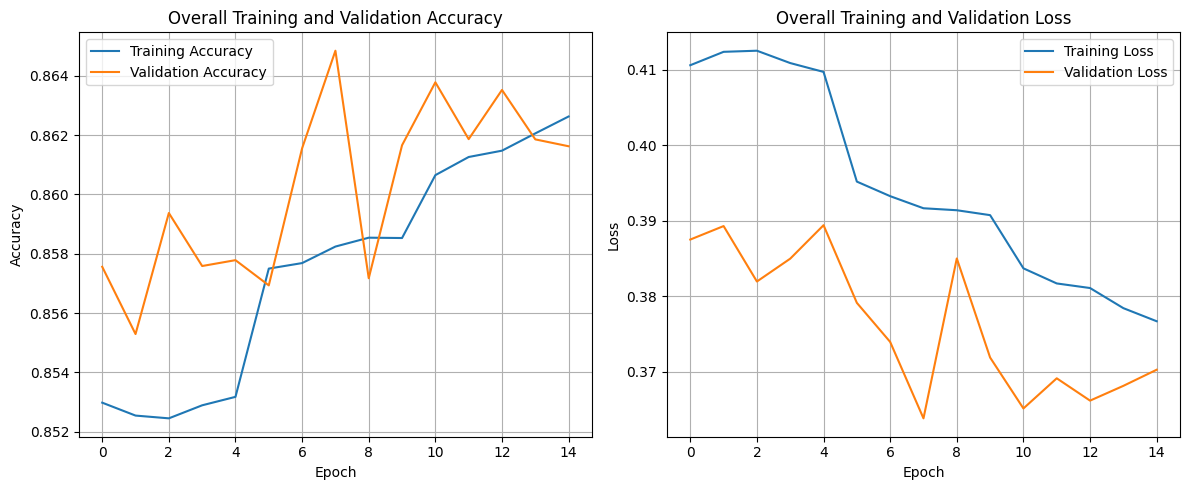

In [ ]:
# --- Setup for training ---

# ----------------------------------------------------------------------------------
# ## EDIT YOUR FOLDER PATH ONLY ONCE HERE ##
# This is the only line you need to change for the save location.
# Make sure this folder exists in your Google Drive.
checkpoint_folder = '/content/drive/MyDrive/CODEALPHA_PROJECTS/Checkpoints_for_epochs/'
# ----------------------------------------------------------------------------------


# --- The rest of the code uses the variable above automatically ---

# Define the full filepath for the BEST model using the folder variable
drive_filepath_best = checkpoint_folder + 'best_emnist_model.weights.h5'

# Define callbacks
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)

# This callback saves ONLY the best model to the path defined above
checkpoint_callback_best = ModelCheckpoint(
    filepath=drive_filepath_best,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# --- Try to load weights to resume from the last best model ---
try:
    improved_model.load_weights(drive_filepath_best)
    print(f"Successfully loaded pre-trained weights from: {drive_filepath_best}")
except Exception as e:
    print(f"Could not load weights: {e}. Starting fresh training.")

# --- Automated Training Loop ---
total_target_epochs = 50
epochs_per_chunk = 5
num_chunks = total_target_epochs // epochs_per_chunk

# This dictionary will store the full history for plotting later
overall_history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': [], 'lr': []}
current_start_epoch = 36

for i in range(current_start_epoch // epochs_per_chunk, num_chunks):
    chunk_start_epoch = i * epochs_per_chunk
    chunk_target_epoch = (i + 1) * epochs_per_chunk

    print("\n" + "="*80)
    print(f"--- Starting training chunk: Epochs {chunk_start_epoch} to {chunk_target_epoch-1} ---")
    print("="*80 + "\n")

    # Train the model for one 5-epoch chunk
    history_chunk = improved_model.fit(
        train_data,
        epochs=chunk_target_epoch,
        initial_epoch=chunk_start_epoch,
        validation_data=test_data,
        callbacks=[learning_rate_reduction, checkpoint_callback_best]
    )

    # Manually append history from this chunk for overall tracking
    for key in overall_history.keys():
        if key in history_chunk.history:
            overall_history[key].extend(history_chunk.history[key])

    # --- SAVE A SNAPSHOT EVERY 5 EPOCHS ---
    # This also uses the single folder path variable from the top
    snapshot_filepath = f'{checkpoint_folder}model_epoch_{chunk_target_epoch}.weights.h5'
    improved_model.save_weights(snapshot_filepath)
    print(f"\n--- Saved snapshot for epoch {chunk_target_epoch} to your Drive ---")

print("\n\nAll training chunks are complete!")


# --- Final Evaluation and Plotting ---
print("\nPerforming final evaluation of the BEST model (from checkpoint)...")
try:
    improved_model.load_weights(drive_filepath_best)
    loss, accuracy = improved_model.evaluate(test_data, verbose=1)
    print(f"\nFinal BEST Model Test Accuracy: {accuracy*100:.2f}%")
except Exception as e:
    print(f"Could not load best weights for final evaluation: {e}.")


# Plotting the overall training history
if overall_history['accuracy']:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(overall_history['accuracy'], label='Training Accuracy')
    plt.plot(overall_history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Overall Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(overall_history['loss'], label='Training Loss')
    plt.plot(overall_history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Overall Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
else:
    print("No training history to plot.")

## Model-5 Used Transfer Learning In order to increase Accuracy

In [ ]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import os
import gc


# 🟢 Change this to your folder path
SAVE_DIR = '/content/drive/MyDrive/CODEALPHA_PROJECTS/Transfer_Learning_checkpoints/'
os.makedirs(SAVE_DIR, exist_ok=True) # ensure directory exists

# Clear any previous sessions
gc.collect()
tf.keras.backend.clear_session()

print("Setup Complete. Drive Mounted.")

Setup Complete. Drive Mounted.


In [ ]:
from tensorflow.keras import layers, models

Using Image Size: 72x72, Batch Size: 64
Number of classes: 62
Setting up data pipelines...
Displaying a sample of preprocessed images...


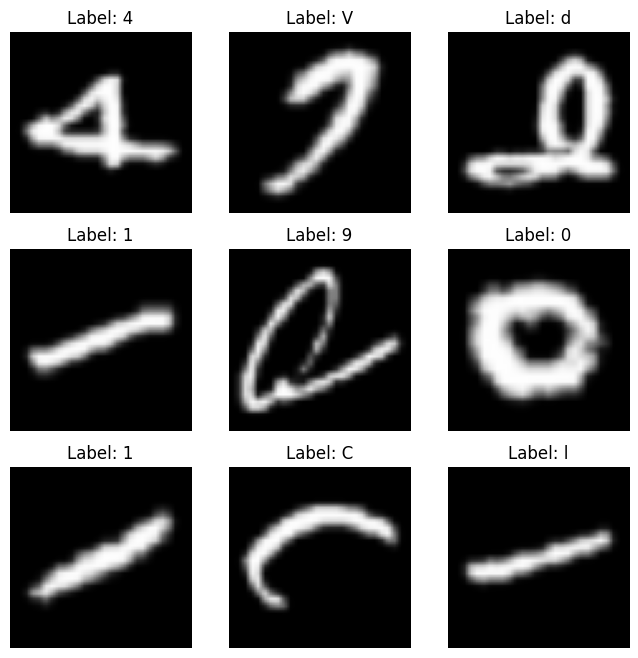

✅ Data loaded and prepared!


In [ ]:
# --- Define Constants ---
IMG_SIZE = 72    # Smaller size to prevent RAM crashes
BATCH_SIZE = 64  # A balanced batch size
print(f"Using Image Size: {IMG_SIZE}x{IMG_SIZE}, Batch Size: {BATCH_SIZE}")

# --- Load the EMNIST 'byclass' dataset ---
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)
NUM_CLASSES = ds_info.features['label'].num_classes
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
print(f"Number of classes: {NUM_CLASSES}")

# --- Preprocessing Function ---
def preprocess(image, label):
    # Convert image data type and normalize
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Convert grayscale to 3 channels (RGB) for the pre-trained model
    image = tf.image.grayscale_to_rgb(image)
    # Resize to the target input size for EfficientNet
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    return image, label

# --- Create the Data Pipelines ---
# No .cache() is used to conserve RAM, making it slightly slower but much safer.
print("Setting up data pipelines...")
train_ds = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_ds = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# --- Visualize a sample ---
print("Displaying a sample of preprocessed images...")
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {class_mapping[labels[i].numpy()]}")
        plt.axis("off")
plt.show()

print("✅ Data loaded and prepared!")

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
# Load the pre-trained EfficientNetB0 model without its top classification layer
base_model = EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)

# Freeze the entire base model so its weights are not updated during initial training
base_model.trainable = False

# Create our new model on top
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# The base model will act as a feature extractor
x = base_model(inputs, training=False)
# Add our custom classifier head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x) # Output layer

model = models.Model(inputs, outputs)

print("✅ Transfer learning model built!")
model.summary()

✅ Transfer learning model built!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 72, 72, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 3, 3, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,394,465 (16.76 MB)

 Trainable params: 344,382 (1.31 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

In [ ]:
# Compile the model for the first phase
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks for this phase
# We save the best model from this phase to a specific file
phase1_checkpoint_path = os.path.join(SAVE_DIR, 'phase1_best_model.weights.h5')
checkpoint_phase1 = ModelCheckpoint(filepath=phase1_checkpoint_path, monitor='val_accuracy',
                                  save_best_only=True, save_weights_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=2, verbose=1, min_lr=1e-6)


# Train the model
print("🚀 Starting Phase 1: Training the top layers...")
EPOCHS_PHASE1 = 15 # Set a higher number, EarlyStopping will handle it
history1 = model.fit(
    train_ds,
    epochs=EPOCHS_PHASE1,
    validation_data=test_ds,
    callbacks=[checkpoint_phase1, early_stopping, reduce_lr]
)

print("✅ Phase 1 training complete!")

🚀 Starting Phase 1: Training the top layers...
Epoch 1/15
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0700 - loss: 3.7151
Epoch 1: val_accuracy improved from -inf to 0.18725, saving model to /content/drive/MyDrive/CODEALPHA_PROJECTS/Transfer_Learning_checkpoints/phase1_best_model.weights.h5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 319s 26ms/step - accuracy: 0.0700 - loss: 3.7151 - val_accuracy: 0.1872 - val_loss: 3.5378 - learning_rate: 0.0010
Epoch 2/15
10904/10906 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0867 - loss: 3.6093
Epoch 2: val_accuracy did not improve from 0.18725
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 211s 19ms/step - accuracy: 0.0867 - loss: 3.6093 - val_accuracy: 0.1642 - val_loss: 3.5375 - learning_rate: 0.0010
Epoch 3/15
10902/10906 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0897 - loss: 3.5996
Epoch 3: val_accuracy did not improve from 0.18725

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
# Unfreeze the base model to allow fine-tuning
base_model.trainable = True

# We'll keep the first few blocks frozen to preserve low-level features
# and only fine-tune the later layers.
fine_tune_at = 100 # Unfreeze from the 100th layer onwards
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Re-compile the model with a very low learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), # <-- Very low learning rate
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define a new checkpoint path for the fine-tuning phase
phase2_checkpoint_path = os.path.join(SAVE_DIR, 'phase2_finetuned_best_model.weights.h5')
checkpoint_phase2 = ModelCheckpoint(filepath=phase2_checkpoint_path, monitor='val_accuracy',
                                  save_best_only=True, save_weights_only=True, verbose=1)

# Continue training (fine-tuning)
print("\n🚀 Starting Phase 2: Fine-tuning the model...")
EPOCHS_PHASE2 = 20 # Train for more epochs
initial_epoch_phase2 = history1.epoch[-1] + 1 # Start counting where phase 1 left off

history2 = model.fit(
    train_ds,
    epochs=initial_epoch_phase2 + EPOCHS_PHASE2,
    initial_epoch=initial_epoch_phase2,
    validation_data=test_ds,
    callbacks=[checkpoint_phase2, early_stopping, reduce_lr]
)

print("✅ Phase 2 fine-tuning complete!")

# --- Final Evaluation ---
# Load the best weights from the fine-tuning phase for a final check
model.load_weights(phase2_checkpoint_path)
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Final Test Accuracy after fine-tuning: {test_acc*100:.2f}%")


🚀 Starting Phase 2: Fine-tuning the model...
Epoch 7/26
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5003 - loss: 1.9801
Epoch 7: val_accuracy improved from -inf to 0.76813, saving model to /content/drive/MyDrive/CODEALPHA_PROJECTS/Transfer_Learning_checkpoints/phase2_finetuned_best_model.weights.h5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 485s 40ms/step - accuracy: 0.5003 - loss: 1.9801 - val_accuracy: 0.7681 - val_loss: 0.7487 - learning_rate: 1.0000e-05
Epoch 8/26
10904/10906 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7575 - loss: 0.8065
Epoch 8: val_accuracy improved from 0.76813 to 0.80533, saving model to /content/drive/MyDrive/CODEALPHA_PROJECTS/Transfer_Learning_checkpoints/phase2_finetuned_best_model.weights.h5
10906/10906 ━━━━━━━━━━━━━━━━━━━━ 438s 36ms/step - accuracy: 0.7575 - loss: 0.8065 - val_accuracy: 0.8053 - val_loss: 0.5849 - learning_rate: 1.0000e-05
Epoch 9/26
10904/10906 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7974 - loss: 0.6274
Epoch 9: val_a